In [1]:
%matplotlib inline

In [2]:
import os
from astropy.table import Table
from astropy.cosmology import Planck15

dirname = "/Users/aphearin/work/sims/bolplanck/orphan_catalog_z0"
basename = "cross_matched_orphan_catalog.hdf5"

halo_table = Table.read(os.path.join(dirname, basename), path='data')

halo_table['vmax_at_mpeak_percentile'] = np.load(
    os.path.join(dirname, 'vmax_percentile.npy'))

halo_table['zpeak'] = 1./halo_table['mpeak_scale']-1.

class HaloCatalog(object):
    def __init__(self, halo_table):
        self.halo_table = halo_table
        self.cosmology = Planck15
        for key in self.halo_table.keys():
            if key[:5] != 'halo_':
                halo_table.rename_column(key, 'halo_'+key)
        
halocat = HaloCatalog(halo_table)

In [3]:
from galsize_models.models import moster13_based_mock

keys_to_keep=list(halocat.halo_table.keys())
keys_to_keep.append('halo_rvir_zpeak')

mock = moster13_based_mock(halocat=halocat, mpeak_key='halo_mpeak', zpeak_key='halo_zpeak', 
                          keys_to_keep=keys_to_keep)

from halotools.empirical_models import noisy_percentile

mock['noisy_vmax_at_mpeak_percentile'] = noisy_percentile(
    mock['vmax_at_mpeak_percentile'], 0.5)

mock_no_orphans = mock[~mock['orphan']]
print("Number of model galaxies with logM* > {0:.1f} = {1:.2e}".format(np.log10(mock['mstar'].min()),len(mock)))

Number of model galaxies with logM* > 9.0 = 1.05e+06


In [4]:
from galsize_models.models import component_size_vs_rhalo

rvir = mock['rvir_zpeak']
normalization_all = 0.0125
alpha_all = 1.
scatter_all = 0.2
size_seed=14041

mock['r50_nocorr'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all)


In [5]:
rvir = mock_no_orphans['rvir_zpeak']
normalization_all = 0.0125
alpha_all = 1.
scatter_all = 0.2
size_seed=14041

mock_no_orphans['r50_nocorr'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all)


In [6]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete, good_profile_mask = load_umachine_sdss_with_meert15()

sdss = full_sdss[behroozi_complete & good_profile_mask]

import os
repo_dirname = "/Users/aphearin/work/repositories/python/galsize_models"
output_subdirname = "galsize_models/measurements/data/two_point_functions"
output_dirname = os.path.join(repo_dirname, output_subdirname)

rp = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_rp.npy'))
wp_sdss_sm9p75_smbell = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_wp.npy'))
wp_sdss_sm9p75_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_small_wp.npy'))
wp_sdss_sm9p75_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_large_wp.npy'))
fracdiff_sm9p75_smbell = (wp_sdss_sm9p75_smbell_large-wp_sdss_sm9p75_smbell_small)/wp_sdss_sm9p75_smbell

wp_sdss_sm10p0_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p0_smbell_wp.npy'))
wp_sdss_sm10p0_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p0_smbell_small_wp.npy'))
wp_sdss_sm10p0_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p0_smbell_large_wp.npy'))
fracdiff_sm10p0_smbell = (wp_sdss_sm10p0_smbell_large-wp_sdss_sm10p0_smbell_small)/wp_sdss_sm10p0_smbell

wp_sdss_sm10p25_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_wp.npy'))
wp_sdss_sm10p25_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_small_wp.npy'))
wp_sdss_sm10p25_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_large_wp.npy'))
fracdiff_sm10p25_smbell = (wp_sdss_sm10p25_smbell_large-wp_sdss_sm10p25_smbell_small)/wp_sdss_sm10p25_smbell

wp_sdss_sm10p5_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p5_smbell_wp.npy'))
wp_sdss_sm10p5_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p5_smbell_small_wp.npy'))
wp_sdss_sm10p5_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p5_smbell_large_wp.npy'))
fracdiff_sm10p5_smbell = (wp_sdss_sm10p5_smbell_large-wp_sdss_sm10p5_smbell_small)/wp_sdss_sm10p5_smbell

wp_sdss_sm10p75_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_wp.npy'))
wp_sdss_sm10p75_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_small_wp.npy'))
wp_sdss_sm10p75_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_large_wp.npy'))
fracdiff_sm10p75_smbell = (wp_sdss_sm10p75_smbell_large-wp_sdss_sm10p75_smbell_small)/wp_sdss_sm10p75_smbell

wp_sdss_sm11_smbell = np.load(os.path.join(output_dirname, 'sdss_sm11_smbell_wp.npy'))
wp_sdss_sm11_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm11_smbell_small_wp.npy'))
wp_sdss_sm11_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm11_smbell_large_wp.npy'))
fracdiff_sm11_smbell = (wp_sdss_sm11_smbell_large-wp_sdss_sm11_smbell_small)/wp_sdss_sm11_smbell

wp_sdss_sm11p25_smbell = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_wp.npy'))
wp_sdss_sm11p25_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_small_wp.npy'))
wp_sdss_sm11p25_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_large_wp.npy'))
fracdiff_sm11p25_smbell = (wp_sdss_sm11p25_smbell_large-wp_sdss_sm11p25_smbell_small)/wp_sdss_sm11p25_smbell

In [7]:
from galsize_models.models import component_size_vs_rhalo

rvir = mock['rvir_zpeak']
normalization_all = 0.0125
alpha_all = 1.
scatter_all = 0.2
size_seed=14041

mock['r50_rscorr'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all, uran=1-mock['vmax_at_mpeak_percentile'])


In [8]:
rvir = mock_no_orphans['rvir_zpeak']
normalization_all = 0.0125
alpha_all = 1.
scatter_all = 0.2
size_seed=14041

mock_no_orphans['r50_rscorr'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all, uran=1-mock_no_orphans['vmax_at_mpeak_percentile'])


In [9]:
rvir = mock['rvir_zpeak']
normalization_all = 0.0125
alpha_all = 1.
scatter_all = 0.2
size_seed=14041

mock['r50_rscorr_partial'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all,
                        uran=1-mock['noisy_vmax_at_mpeak_percentile'])


In [10]:
rvir = mock_no_orphans['rvir_zpeak']
normalization_all = 0.0125
alpha_all = 1.
scatter_all = 0.2
size_seed=14041

mock_no_orphans['r50_rscorr_partial'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all, 
                        uran=1-mock_no_orphans['noisy_vmax_at_mpeak_percentile'])


In [11]:
mpeak_bins = np.logspace(11, 15, 50)

from scipy.stats import binned_statistic
logsm_bins = np.linspace(9, 12.25, 35)
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])

from galsize_models.measurements import single_component_ratios


In [12]:
mock['r50'] = mock['r50_nocorr']

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock['mstar']), mock['r50'], bins=logsm_bins)

mock['r50_median'] = np.interp(np.log10(mock['mstar']), 
                              logsm_mids, median_rhalf_mock)

result = single_component_ratios(mock, num_gals_max=int(1e5))
rp_mids, fracdiff_sm9p75_mock_nocorr_all, fracdiff_sm10p25_mock_nocorr_all, \
fracdiff_sm10p75_mock_nocorr_all, fracdiff_sm11p25_mock_nocorr_all = result


In [13]:
mock_no_orphans['r50'] = mock_no_orphans['r50_nocorr']

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock_no_orphans['mstar']), mock_no_orphans['r50'], bins=logsm_bins)

mock_no_orphans['r50_median'] = np.interp(np.log10(mock_no_orphans['mstar']), 
                              logsm_mids, median_rhalf_mock)

result = single_component_ratios(mock_no_orphans, num_gals_max=int(1e5))
rp_mids, fracdiff_sm9p75_mock_nocorr_no_orphans, fracdiff_sm10p25_mock_nocorr_no_orphans, \
fracdiff_sm10p75_mock_nocorr_no_orphans, fracdiff_sm11p25_mock_nocorr_no_orphans = result


In [14]:
mock['r50'] = mock['r50_rscorr']
print(mock['r50'].min(), mock['r50'].mean(), mock['r50'].max())

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock['mstar']), mock['r50'], bins=logsm_bins)

mock['r50_median'] = np.interp(np.log10(mock['mstar']), 
                              logsm_mids, median_rhalf_mock)


result = single_component_ratios(mock, num_gals_max=int(1e5))
rp_mids, fracdiff_sm9p75_mock_rscorr_all, fracdiff_sm10p25_mock_rscorr_all, \
fracdiff_sm10p75_mock_rscorr_all, fracdiff_sm11p25_mock_rscorr_all = result


(0.048508636223188274, 2.6049901355959544, 39.10891232287981)


In [15]:
mock_no_orphans['r50'] = mock_no_orphans['r50_rscorr']
print(mock_no_orphans['r50'].min(), mock_no_orphans['r50'].mean(), mock_no_orphans['r50'].max())

median_rhalf_mock_no_orphans, __, __ = binned_statistic(
        np.log10(mock_no_orphans['mstar']), mock_no_orphans['r50'], bins=logsm_bins)

mock_no_orphans['r50_median'] = np.interp(np.log10(mock_no_orphans['mstar']), 
                              logsm_mids, median_rhalf_mock_no_orphans)


result = single_component_ratios(mock_no_orphans, num_gals_max=int(1e5))
rp_mids, fracdiff_sm9p75_mock_rscorr_no_orphans, fracdiff_sm10p25_mock_rscorr_no_orphans, \
fracdiff_sm10p75_mock_rscorr_no_orphans, fracdiff_sm11p25_mock_rscorr_no_orphans = result


(0.1888954455620501, 3.7269564845354282, 39.10891232287981)


In [17]:
mock['r50'] = mock['r50_rscorr_partial']
print(mock['r50'].min(), mock['r50'].mean(), mock['r50'].max())

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock['mstar']), mock['r50'], bins=logsm_bins)

mock['r50_median'] = np.interp(np.log10(mock['mstar']), 
                              logsm_mids, median_rhalf_mock)


result = single_component_ratios(mock, num_gals_max=int(1e5))
rp_mids, fracdiff_sm9p75_mock_rscorr_partial_all, fracdiff_sm10p25_mock_rscorr_partial_all, \
fracdiff_sm10p75_mock_rscorr_partial_all, fracdiff_sm11p25_mock_rscorr_partial_all = result


(0.042193397022389417, 2.5000955824248159, 82.986598112547995)


In [18]:
mock_no_orphans['r50'] = mock_no_orphans['r50_rscorr_partial']

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock_no_orphans['mstar']), mock_no_orphans['r50'], bins=logsm_bins)

mock_no_orphans['r50_median'] = np.interp(np.log10(mock_no_orphans['mstar']), 
                              logsm_mids, median_rhalf_mock)


result = single_component_ratios(mock_no_orphans, num_gals_max=int(1e5))
rp_mids, fracdiff_sm9p75_mock_rscorr_partial_no_orphans, fracdiff_sm10p25_mock_rscorr_partial_no_orphans, \
fracdiff_sm10p75_mock_rscorr_partial_no_orphans, fracdiff_sm11p25_mock_rscorr_partial_no_orphans = result


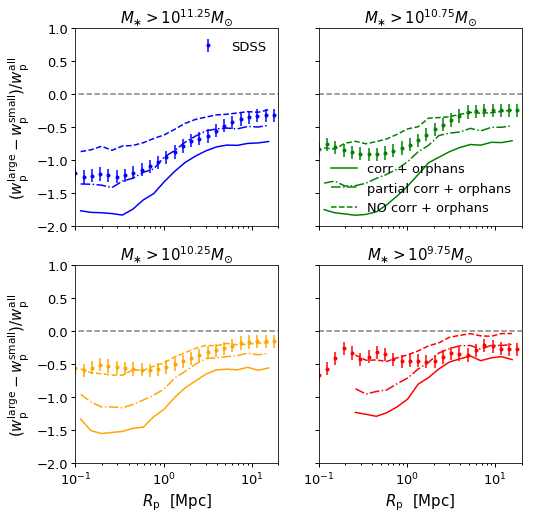

In [52]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, 
                                             figsize=(8, 8))

axes = ax1, ax2, ax3, ax4

for ax in axes:
    ylim = ax.set_ylim(-2, 1)
    xlim = ax.set_xlim(0.1, 20)
    xscale = ax.set_xscale('log')
    __=ax.plot(np.logspace(-2, 2, 100), np.zeros(100), '--', color='gray')

    
__=ax4.errorbar(rp, fracdiff_sm11p25_smbell, 0.1, fmt='.', color='red')
__=ax3.errorbar(rp, fracdiff_sm10p75_smbell, 0.1, fmt='.', color='orange')
__=ax2.errorbar(rp, fracdiff_sm10p25_smbell, 0.1, fmt='.', color='green')
__=ax1.errorbar(rp, fracdiff_sm9p75_smbell, 0.1, fmt='.', color='blue', 
               label='SDSS')

__=ax4.plot(rp_mids[3:], fracdiff_sm11p25_mock_rscorr_all[3:], color='red')
__=ax3.plot(rp_mids, fracdiff_sm10p75_mock_rscorr_all, color='orange')
__=ax2.plot(rp_mids, fracdiff_sm10p25_mock_rscorr_all, color='green', 
           label='corr + orphans')
__=ax1.plot(rp_mids, fracdiff_sm9p75_mock_rscorr_all, color='blue')

__=ax4.plot(rp_mids[3:], fracdiff_sm11p25_mock_rscorr_partial_all[3:], '-.', color='red')
__=ax3.plot(rp_mids, fracdiff_sm10p75_mock_rscorr_partial_all, '-.', color='orange')
__=ax2.plot(rp_mids, fracdiff_sm10p25_mock_rscorr_partial_all, '-.', color='green', 
           label='partial corr + orphans')
__=ax1.plot(rp_mids, fracdiff_sm9p75_mock_rscorr_partial_all, '-.', color='blue')

__=ax4.plot(rp_mids[3:], fracdiff_sm11p25_mock_nocorr_all[3:], '--', color='red')
__=ax3.plot(rp_mids, fracdiff_sm10p75_mock_nocorr_all, '--', color='orange')
__=ax2.plot(rp_mids, fracdiff_sm10p25_mock_nocorr_all, '--', color='green', 
           label='NO corr + orphans')
__=ax1.plot(rp_mids, fracdiff_sm9p75_mock_nocorr_all, '--', color='blue')



# __=ax4.plot(rp_mids[3:], fracdiff_sm11p25_mock_rscorr_no_orphans[3:], '-.', color='red')
# __=ax3.plot(rp_mids, fracdiff_sm10p75_mock_rscorr_no_orphans, '-.', color='orange', 
#            label='corr + NO orphans')
# __=ax2.plot(rp_mids, fracdiff_sm10p25_mock_rscorr_no_orphans, '-.', color='green')
# __=ax1.plot(rp_mids, fracdiff_sm9p75_mock_rscorr_no_orphans, '-.', color='blue')

# __=ax4.plot(rp_mids[3:], fracdiff_sm11p25_mock_nocorr_no_orphans[3:], ':', color='red')
# __=ax3.plot(rp_mids, fracdiff_sm10p75_mock_nocorr_no_orphans, ':', color='orange', 
#            label='NO corr + NO orphans')
# __=ax2.plot(rp_mids, fracdiff_sm10p25_mock_nocorr_no_orphans, ':', color='green')
# __=ax1.plot(rp_mids, fracdiff_sm9p75_mock_nocorr_no_orphans, ':', color='blue')



__=ax1.set_title(r'$M_{\ast} > 10^{11.25}M_{\odot}$')
__=ax2.set_title(r'$M_{\ast} > 10^{10.75}M_{\odot}$')
__=ax3.set_title(r'$M_{\ast} > 10^{10.25}M_{\odot}$')
__=ax4.set_title(r'$M_{\ast} > 10^{9.75}M_{\odot}$')

ylabel1 = ax1.set_ylabel(r'$(w_{\rm p}^{\rm large} - w_{\rm p}^{\rm small}) / w_{\rm p}^{\rm all}$')
ylabel3 = ax3.set_ylabel(r'$(w_{\rm p}^{\rm large} - w_{\rm p}^{\rm small}) / w_{\rm p}^{\rm all}$')
xlabel3 = ax3.set_xlabel(r'$R_{\rm p}$  $[{\rm Mpc}]$')
xlabel4 = ax4.set_xlabel(r'$R_{\rm p}$  $[{\rm Mpc}]$')

leg1 = ax1.legend()
leg2 = ax2.legend()

figname = 'clustering_ratios_with_orphans.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel3], bbox_inches='tight')


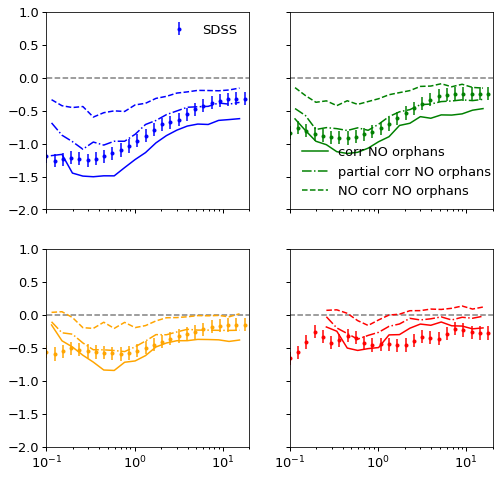

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, 
                                             figsize=(8, 8))

axes = ax1, ax2, ax3, ax4

for ax in axes:
    ylim = ax.set_ylim(-2, 1)
    xlim = ax.set_xlim(0.1, 20)
    xscale = ax.set_xscale('log')
    __=ax.plot(np.logspace(-2, 2, 100), np.zeros(100), '--', color='gray')

    
__=ax4.errorbar(rp, fracdiff_sm11p25_smbell, 0.1, fmt='.', color='red')
__=ax3.errorbar(rp, fracdiff_sm10p75_smbell, 0.1, fmt='.', color='orange')
__=ax2.errorbar(rp, fracdiff_sm10p25_smbell, 0.1, fmt='.', color='green')
__=ax1.errorbar(rp, fracdiff_sm9p75_smbell, 0.1, fmt='.', color='blue', 
               label='SDSS')

__=ax4.plot(rp_mids[3:], fracdiff_sm11p25_mock_rscorr_no_orphans[3:], color='red')
__=ax3.plot(rp_mids, fracdiff_sm10p75_mock_rscorr_no_orphans, color='orange')
__=ax2.plot(rp_mids, fracdiff_sm10p25_mock_rscorr_no_orphans, color='green', 
           label='corr NO orphans')
__=ax1.plot(rp_mids, fracdiff_sm9p75_mock_rscorr_no_orphans, color='blue')

__=ax4.plot(rp_mids[3:], fracdiff_sm11p25_mock_rscorr_partial_no_orphans[3:], '-.', color='red')
__=ax3.plot(rp_mids, fracdiff_sm10p75_mock_rscorr_partial_no_orphans, '-.', color='orange')
__=ax2.plot(rp_mids, fracdiff_sm10p25_mock_rscorr_partial_no_orphans, '-.', color='green', 
           label='partial corr NO orphans')
__=ax1.plot(rp_mids, fracdiff_sm9p75_mock_rscorr_partial_no_orphans, '-.', color='blue')

__=ax4.plot(rp_mids[3:], fracdiff_sm11p25_mock_nocorr_no_orphans[3:], '--', color='red')
__=ax3.plot(rp_mids, fracdiff_sm10p75_mock_nocorr_no_orphans, '--', color='orange')
__=ax2.plot(rp_mids, fracdiff_sm10p25_mock_nocorr_no_orphans, '--', color='green', 
           label='NO corr NO orphans')
__=ax1.plot(rp_mids, fracdiff_sm9p75_mock_nocorr_no_orphans, '--', color='blue')

leg1 = ax1.legend()
leg2 = ax2.legend()

figname = 'clustering_ratios_NO_orphans.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel3], bbox_inches='tight')


In [24]:
print(mock.keys())

['upid', 'mpeak', 'rvir', 'mvir', 'vx', 'vy', 'vz', 'uparent_dist', 'vmax', 'desc_id', 'id', 'vmax_at_mpeak', 'y', 'x', 'z', 'dvmax_rank', 'orphan', 'last_snap', 'last_snap_halo_id', 'has_halotools_match', 'mpeak_scale', 'acc_scale', 'first_acc_scale', 'halfmass_scale', 'has_orphan_hlist_match', 'sm', 'vmax_at_mpeak_percentile', 'zpeak', 'rvir_zpeak', 'mstar', 'mstar_moster13', 'noisy_vmax_at_mpeak_percentile', 'r50_nocorr', 'r50_rscorr', 'r50_rscorr_partial', 'r50', 'r50_median']


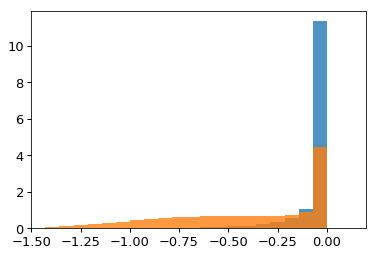

In [41]:
fig, ax = plt.subplots(1, 1)

frac_dm = mock['mvir']/mock['mpeak']
frac_sm = 1 - np.exp(-14.2*frac_dm)

true_satmask = (~mock['orphan']) & (mock['upid'] != -1)
satmask = mock['upid'] != -1

__=ax.hist(np.log10(frac_sm[true_satmask]), bins=30, normed=True, alpha=0.8)
__=ax.hist(np.log10(frac_sm[satmask]), bins=30, normed=True, alpha=0.8)
# __=ax.hist(np.log10(frac_sm[mock['orphan']]), bins=30, normed=True, alpha=0.8)

# __=ax.hist(np.log10(frac_sm[mock['orphan']]), bins=30, normed=True, alpha=0.8)

xlim = ax.set_xlim(-1.5, 0.2)

In [50]:
mask = satmask
np.count_nonzero(frac_sm[mask] < 0.5)/float(len(frac_dm[mask]))

0.5097901124235831

-2.0481574e+20